# Soft Computing

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

### On-site cvičení

V tomto cvičení se bude rozebírat zejména termín Soft Computing a jeho techniky. Mentální obrázek myšlenky tohoto nově vznikajícího oboru je dobré mít na paměti během všech cvičení, ať se znalosti lépe asimilují do znalostní struktury studenta. Na závěr cvičení se podíváme na několik základních technik z oblasti statistiky pro analýzu dat, které v následujících hodinách nahradíme technikama Soft Computingu (například regrese).

Zdroje:
* [vesmir.cz](https://vesmir.cz/cz/casopis/archiv-casopisu/2000/cislo-12/soft-computing.html)
* [javatpoint.com](https://www.javatpoint.com/what-is-soft-computing)

#### 1.1 Soft Computing (podle L. Zadeha)

<img src="SOC1_soubory/soft.jpg" style="height:250px">

**Princip neslučitelnosti**

Naše poznání reálného světa je plné nepřesnosti, potřebné informace jsou často nedostupné, analyzované systémy nepřesně či neúplně definované (např. v ekonomii, plánování, živých systémech či společenských systémech). Problémy právě nastíněného typu se neslučují s ideálem exaktního optimálního řešení. Optimální řešení buďto neexistují, nebo jsou nezajímavá či příliš nákladná; je třeba učit se toleranci a hledat řešení, která jsou dostatečně dobrá.

Jsou známy přesné (diferenciální) rovnice popisující zcela přesně nejlepší cestu, po níž by mělo vaše auto jet, aby v dané situaci optimálně zaparkovalo. Tuto rovnici ale určitě při parkování nepoužijete; stačí pár přibližných pravidel jako „teď při couvání zahnu hodně doleva“ apod.

**Definice Soft Computingu**

Soft computing (SC) je spojení výpočtových metodologií, jako jsou zejména fuzzy logika, neuropočítání, genetické (evoluční) počítání a pravděpodobnostní počítání. Metodologie zahrnující soft computing jsou ponejvíce komplementární a synergistické, spíše než konkurenční. Vedoucím principem SC je využití tolerance vůči nepřesnosti, nejistotě, částečné pravdě a aproximaci k dosažení zvládnutelnosti, robustnosti, nižší ceny řešení a lepšího souhlasu s realitou. 

**Hard Computing vs. Soft Computing**

<table>
<tr>
    <th></th><th>Hard computing</th><th>Soft computing</th>
</tr>
<tr>
    <th>Výpočetní náročnost (čas):</th><td>Náročný</td><td>Méně náročný</td>
</tr>
<tr>
    <th>Výpočetní typ:</th><td>Sériový</td><td>Paralelní</td>
</tr>
<tr>
    <th>Typ výstupu:</th><td>Exaktní</td><td>Aproximovaný</td>
</tr>
<tr>
    <th>Příklad technik:</th><td>Numerické</td><td>Fuzzy, Evoluční, Statistické</td>
</tr>
</table>

#### 1.2 Úlohy strojového učení

Strojové učení je hlavní soustava metod, které Soft Computing používá. Strojové učení můžeme rozdělit do 3 velkých kategorií (v další kapitole je jemnější dělení) a to s učitelem, bezučitele a zpětnovazební.

<img src="SOC1_soubory/pristupy.png" style="height:300px">

Tyto metody ze zmíněných kategorií umožňují řešit problémy, které rozdělujeme do tří typů: klasifikace, regrese a shlukování.

* klasifikace = predikce správné kategorie ke vstupu (př. rozpoznání ručně psaných číslic)
* regrese = predikce spojité hodnoty ke vstupu (př. predikce závažnosti rozvoje cukrovky podle BMI)
* shlukování = shluknutí společných dat do klastrů podle podobnosti atributů

<img src="SOC1_soubory/ulohy.png" style="height:220px">


In [ ]:
!python3 -m pip install matplotlib

In [ ]:
!python3 -m pip install numpy

In [ ]:
!python3 -m pip install scikit-learn

In [75]:
import matplotlib.pyplot as plt
import numpy as np

**Klasifikace**

In [58]:
# Importování datových sad, modelu podpůrných vektorů a metriky pro analýzu
from sklearn import datasets, svm, metrics

# Importování nástroje pro snadné dělení dat na trénovací a testovací
from sklearn.model_selection import train_test_split

In [78]:
#nahraní datové sady (číslice psané rukou)
digits = datasets.load_digits()
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
0


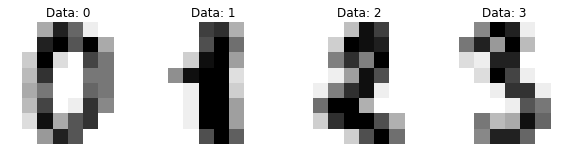

In [79]:
#vykreslení datové sady do matice pixelů
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Data: %i" % label)

In [80]:
# zploštění matice dat na vektor dat
print(digits.images.shape)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 8, 8)
(1797, 64)


In [62]:
# dělení dat na trénovací a testovací pomocí pomocné funkce (půl na půl nezamíchaně)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [81]:
# inicializace klasifikátoru - použijeme model podpůrných vektorů (SVM)
clf = svm.SVC(gamma=0.001)

In [83]:
# trénovaní modelu na trénovací datové sadě
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [84]:
# predikce třídy na testovací datové sadě
predicted = clf.predict(X_test)

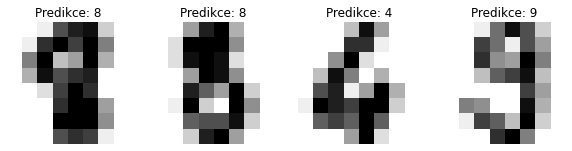

In [85]:
# vykreslení testovacích dat a jejich predikované třídy
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Predikce: {prediction}")

In [86]:
# report o efektivitě klasifikace pomocí metrik z sklearn (predikce vs. skutečnost)
print(
    f"Klasifikační report pro model {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Klasifikační report pro model SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


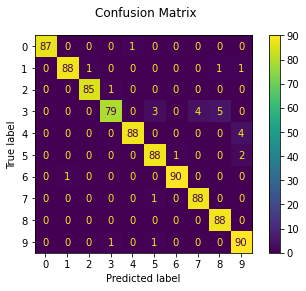

In [87]:
#vykreslení matice zmatenosti (confusion matrix)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Regrese**

In [88]:
#nahrání potrebných modulů
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
#nahrání datové sady pro diabetes
#https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [90]:
#age, sex, bmi, avg blood pressure, cholesterol, ... 
#data jsou centrovaná ke střední hodnotě a škálovaná směrodatnou odchylkou
print(diabetes_X[0])
print(diabetes_X[1])

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]


In [91]:
#kvantitativní vyjádření průběhu nemoci
print(diabetes_y[0])
print(diabetes_y[1])

151.0
75.0


In [92]:
#použijeme pro sledování průběhu jen BMI (index 2)
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(diabetes_X[0])

[0.06169621]


In [93]:
#dělení dat na trénovací a testovací datové sady
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print(diabetes_X_train.shape)
print(diabetes_X_test.shape)

(422, 1)
(20, 1)


In [94]:
#inicializace modelu - LinearRegression je numerický model Metody nejmenších čtverců
regr = linear_model.LinearRegression()

In [95]:
#trénování modelu pomocí trénovací datové sady
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [96]:
#predikování hodnot pomocí modelu
diabetes_y_pred = regr.predict(diabetes_X_test)

In [97]:
# Koeficienty regresní přímky
print("Koeficienty:", regr.coef_)

# Střední kvadratická chyba = přesnost odhadů regrese pomocí střední hodnoty druhých mocnin rozdílů
print("Střední kvadratická chyba: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Koeficient derterminace = míra kvality regresního modelu, dokonalá determinace = 1
print("Koeficient determinace: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Koeficienty: [938.23786125]
Střední kvadratická chyba: 2548.07
Koeficient determinace: 0.47


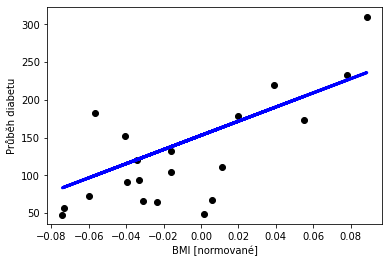

In [98]:
# Vykreslení regrese
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xlabel("BMI [normované]")
plt.ylabel("Průběh diabetu")
plt.show()

**Shlukování**

In [99]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

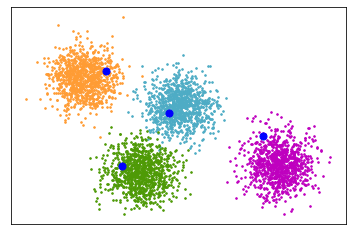

In [105]:
# Generování vzorků pro 4 třídy
n_samples = 4000
n_components = 4

# Generování náhodných souřadnic bodů o 4 třídách (centra bodů), X = 2D souřadnice, y_true = třídy
X, y_true = make_blobs(n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0)

# Obrácení souřadnic x, y = y, x pro všechna Xi in X
X = X[:, ::-1]

# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

# Plot init seeds along side sample data
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

#obarvení a vykreslení všech bodů podle tříd
for icolor, color in enumerate(colors):
    cluster_data = y_true == icolor
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=color, marker=".", s=10)

#vykreslení center z kmeans++ metody
plt.figure(1)
plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.xticks([])
plt.yticks([])
plt.show()

#### 1.3 Přístupy ke strojovému učení

<img src="SOC1_soubory/aplikace.jpg" style="height:500px">

**S učitelem (supervised)**

Vstupem algoritmu je tzv. trénovací množina dat, která obsahuje vstupy a výstupy k těmto vstupům (ty zjistil nějaký učitel). Algoritmus má za úkol nalézt univerzální pravidlo pro mapování vstupů na výstupy. Univerzální pravidlo je následně testováno na trénovaí množině dat, se kterou se algoritmus během tréninku nesetkal. Používá se zejména u neuronových sítích pro kognitivní funkce.

<img src="SOC1_soubory/sl.jpeg" style="height:250px">

**Bez učitele (unsupervised)**

Vstupem algoritmu jsou pouze data, která nejsou nijak označená (žádný výstup). Algoritmus má za úkol nalézt vzory v datech a zařadit je do kategorií (výstup ke vstupu). Používá se zejména pro dolování dat a učení multiagentních systémů.

<img src="SOC1_soubory/usl.png" style="height:200px">

**Částečně s učitelem (semi-supervised)**

Vstupem algoritmu je trénovací množina dat se vstupy a výstupy, avšak k některým vstupům výstupy chybí. V praxi se jedná o velkou množinu vstupů bez výstupů (učení bez učitele) a malé množství dat s výstupy (učení s učitelem).

<img src="SOC1_soubory/ssl.png" style="height:400px">

**Se slabým učitelem (weakly supervised)**

Vstupem algoritmu je trénovací množina dat se vstupy a výstupy, avšak kvalita výstupu je nízká. Výstupy jsou zašuměné, špatně oklasifikované nebo nepřesné. Taková data jsou však v běžném životě často zastoupena. Jedná se vlastně o vágní data, která lze získat i velmi levně z mnoha zdrojů.

<img src="SOC1_soubory/wsl.png" style="height:500px">

**Zpětnovazební (reiforcement)**

Algoritmus interaguje s dynamickým prostředím, ve kterým plní nějaký úkol (řízení vozidla, hraní fotbalu v týmu). K učení dochází na základě odměňování za efektivní plnění úkolů v prostředí. Příkladem takového přístupu je Q-learning.

<img src="SOC1_soubory/rl.jpg" style="height:200px">

**Redukce dimenzionality**

Algoritmus má za cíl snížit počet dat nebo dimenzí. Tím dojde ke snížení potřebného času pro analýzu a i potenciální zkvalitnění učení nad daty ostatními algoritmy. Příkladem takové techniky je PCA (Principal Component Analysis), která převádí například 3D data (datové kostky) do 2D dat (matice) nebo manifold learning.

<img src="SOC1_soubory/dimreduc.png" style="height:250px">

**Meta učení (meta-learning)**

Algoritmy se učí jak se učít (learning to learn). K tomu se využívá buď dalších modelů, který pomáhají modelům se učit, nebo různé techniky hledající hyperparametry (nastavení proměnných modelů), které se typicky optimalizují na základě experimentálního ověření kvality modelu nebo meta dat (dat o datech).

<img src="SOC1_soubory/metalearning.png" style="height:200px">

#### 1.4 Modely Soft Computingu

<img src="SOC1_soubory/modely.jpg" style="height:500px">

**Fuzzy počítání**

Počítače velice dobře fungují na množinové matematice. Problémem však zůstává podle principu neslučitelnosti, že v reálném životě nejsou pro informace jasně definované kategorie. Teplota může být pro někoho vysoká a pro jiného střední. Muž může být pro jednu ženu pohledný a pro jinou nepohledný. Objekty reálného světa náleží do určitých kategorií jen s nějakou pravděpodobností, což modelují fuzzy množiny. Na nich jsou pak definované množinové operace, které umožňují pracovat s vágními (neurčitými) daty reálného světa.

<img src="SOC1_soubory/fuzzy.jpg" style="height:150px">

**Neuronové sítě**

Neuronové sítě jsou nejpoužívanější technika strojového učení, která využívá matematický model biologického neuronu. Tento neuron má vstupy pro signály s proměnlivými vahami, které mohou inhibovat činnost neuronu, která závisí na jeho výstupní funkci. Neurony se shlukují do vrstev, které jsou na sebe napojené (hluboké učení). Vrstvy mohou mít i speciální funkce, které pomáhají simulovat kognitivní funkce: konvoluční (analýza obrazu), rekurentní (paměť), zahazovací (zapomínání informací), atd. Jejich architektura má také velký vliv na efektivitu a mohou sloužit pro generování aktiv (GAN sítě) nebo doporučovaní aktiv (paralelní sítě v doporučovacích systémech).

<img src="SOC1_soubory/neuralnetwork.png" style="height:450px">

**Evoluční počítání**

Mezi nejpoužívanější verzi evolučních výpočtu patří genetický algoritmus, ve kterém jsou potenciální kandidáti na řešení problému zákodovány do binárních řetězců, na které jsou aplikovány evoluční operátory selekce, křížení a mutace. Tím se simuluje Darwinovo výběr nejsilnějších jedinců do další generace. Po dostatečné době dojde ke konvergenci k optimu.

<img src="SOC1_soubory/evolution.png" style="height:450px">

**Pravděpodobnostní usuzování**

Techniky tradičního usuzování na základě pravděpodobnosti (Bayesovská statistika je schopná i rozpoznat písmo), tak i složité techniky jako posibilistické měry.

<img src="SOC1_soubory/bayesian.jpeg" style="height:350px">

**Rozhodovací stromy**

Prediktivní model, který je reprezentován datovou strukturou strom. Uzly představují rozhodovací podmínky, který dělí data do tříd (větve). Využívá se zejména v oblasti dolování dat.

<img src="SOC1_soubory/dectree.png" style="height:350px">

**Podpůrné vektorové stroje**

Lineární (případně nelineární s využitím jádrového triku) klasifikátor dat do kategorií, který je obdobný neuronovým sítím. Díky jádrovému triku je velice flexibilní a efektivní klasifikátor, který využívá zvyšování odsazení hranic tříd od sebe, které jsou vytyčené podpůrnými vektory.

<img src="SOC1_soubory/svm.png" style="height:350px">

**Těžení dat**

Získávání cenných znalostí z velkého množství souborů dat. Příklad je korelace věku a pohlaví zákazníka v pandemické krizi se spotřebním chováním, což může zajistit konkurenční výhody podniku v jeho okolí.

<img src="SOC1_soubory/datamining.png" style="height:300px">

**Hybridní přístupy**

Soft Computing je o synergii technik strojového učení. Příklady synergie:

* Fuzzy pravidla pro rozhodování mohou být optimalizovány neuronovou sítí nebo genetickým algoritmem
* Genetický algoritmus může být řízen fuzzy regulátorem
* Neuronová síť může mít architekturu utvářenou genetickým programováním
* Fuzzy possibilistický přístup k rozhodování (vágní a náhodné veličiny)
